In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


(50000, 28, 28) (50000,)


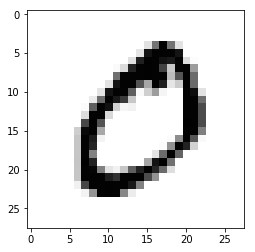

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[1], cmap="Greys");

In [3]:
W1 = tf.get_variable("W1",  [784, 128], initializer=tf.contrib.layers.xavier_initializer(),dtype = tf.float32)
b1 = tf.get_variable("b1",  [128], initializer=tf.zeros_initializer(),dtype = tf.float32)
W2 = tf.get_variable("W2",  [128, 256], initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
b2 = tf.get_variable("b2",  [256], initializer=tf.zeros_initializer(),dtype = tf.float32)
W3 = tf.get_variable("W3", [256, 10], initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
b3 = tf.get_variable("b3",  [10], initializer=tf.zeros_initializer(),dtype = tf.float32)

In [4]:
X_train = X_train.reshape([X_train.shape[0], np.square(X_train.shape[1])])
X_test = X_test.reshape([X_test.shape[0], np.square(X_test.shape[1])])
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32)

In [5]:
Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)

In [6]:
def entropy_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [7]:
loss = entropy_cost(A3, Y)
starter_learning_rate = 0.0001
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.75, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()

In [ ]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [ ]:
batch_size = 100
with tf.Session() as sess:
    sess.run(init)
    training_loss = []
    testing_loss = []
    for epoch in range(500):
        for i in range(0, X_train.shape[0], batch_size):
            sess.run(optimizer, feed_dict = {X: X_train[i:i+batch_size], Y: y_train[i:i+batch_size], keep_prob:0.5})
        training_loss.append(sess.run(loss, feed_dict={X:X_train, Y:y_train, keep_prob:1}))
        testing_loss.append(sess.run(loss, feed_dict={X:X_test, Y:y_test, keep_prob:1}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(training_loss[-1]))
    
    iterations = list(range(500))
    plt.plot(iterations, training_loss, label='Train')
    plt.plot(iterations, testing_loss, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

Test cost after 10 epochs: 1.52708
Test cost after 20 epochs: 1.50496
Test cost after 30 epochs: 1.49465
Test cost after 40 epochs: 1.48852
Test cost after 50 epochs: 1.48436
Test cost after 60 epochs: 1.48141
Test cost after 70 epochs: 1.47924
Test cost after 80 epochs: 1.47734
Test cost after 90 epochs: 1.4759
Test cost after 100 epochs: 1.47489
Test cost after 110 epochs: 1.47389
Test cost after 120 epochs: 1.47306
Test cost after 130 epochs: 1.47217
Test cost after 140 epochs: 1.47149
